# 911 Calls EDA Project

## Import numpy and pandas

In [1]:
import numpy as np
import pandas as pd

## Import visualization libraries and set %matplotlib inline.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read in the csv file as a dataframe called df

In [3]:
df = pd.read_csv("C:\\Users\\uxoriousghost\\Downloads\\call Dataset.csv")
df.drop("e",axis = 1, inplace = True)
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


## Check the info() of the df

In [4]:
df.info()
#The columns zip, twp & addr have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
dtypes: float64(3), object(5)
memory usage: 6.1+ MB


## What are the top 5 zipcodes for 911 calls?

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

## What are the top 5 townships (twp) for 911 calls?

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

## Take a look at the 'title' column, how many unique title codes are there?

In [7]:
df['title'].nunique()

110

# In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value. 

## For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS

In [8]:
df['reason'] = df['title'].apply(lambda x : x.split(':')[0])
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS


## What is the most common Reason for a 911 call based off of this new column?

In [9]:
df['reason'].value_counts().head(1)

EMS    48877
Name: reason, dtype: int64

## Now use seaborn to create a countplot of 911 calls by Reason.

'EMS calls are the most calls made followed by traffic \n   and fire taking the last place\n   Hence we can conclude that there are more EMS problems compared \n   to fire and traffic.'

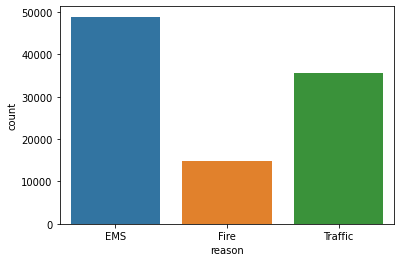

In [10]:
sns.countplot(x = "reason", data = df)
'''EMS calls are the most calls made followed by traffic 
   and fire taking the last place
   Hence we can conclude that there are more EMS problems compared 
   to fire and traffic.'''


## Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?

In [11]:
type(df['timeStamp'][0])

str

## You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
time = df['timeStamp'][0]

In [14]:
time

Timestamp('2015-12-10 17:40:00')

In [15]:
time.hour

17

In [16]:
time.year

2015

In [17]:
time.day

10

In [18]:
time.second

0

In [19]:
time.minute

40

In [20]:
time.day_name()

'Thursday'

In [21]:
time.dayofyear

344

In [22]:
time.daysinmonth

31

In [23]:
time.is_leap_year

False

In [24]:
time.month_name()

'December'

In [25]:
df['hour'] =  df['timeStamp'].apply(lambda x:x.hour)
df['month']=  df['timeStamp'].apply(lambda x:x.month)
df['day of week'] = df['timeStamp'].apply(lambda x:x.dayofweek)

df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,3


## Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

In [26]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [27]:
df['day of week'] = df['day of week'].map(dmap)
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,Thu


## Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

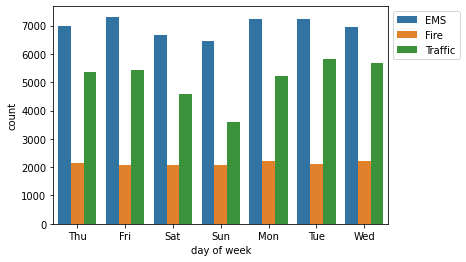

In [28]:
sns.countplot(data = df, x = 'day of week', hue = 'reason')
plt.legend(bbox_to_anchor = (1,1))

## Now do the same for Month:

' The months 9,10 & 11 are missing from the dataset.'

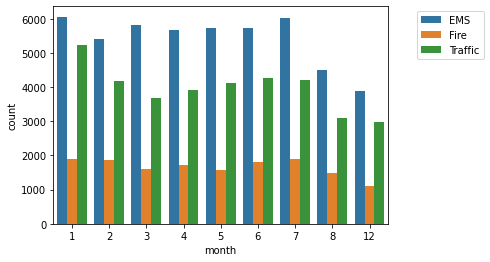

In [29]:
sns.countplot(data = df ,x = 'month', hue ='reason')
plt.legend(bbox_to_anchor=(1.3,1))
''' The months 9,10 & 11 are missing from the dataset.'''

In [30]:
byMonth = df.groupby('month').count()
print(byMonth)
type(byMonth)

         lat    lng   desc    zip  title  timeStamp    twp   addr  reason  \
month                                                                       
1      13205  13205  13205  11527  13205      13205  13203  13096   13205   
2      11467  11467  11467   9930  11467      11467  11465  11396   11467   
3      11101  11101  11101   9755  11101      11101  11092  11059   11101   
4      11326  11326  11326   9895  11326      11326  11323  11283   11326   
5      11423  11423  11423   9946  11423      11423  11420  11378   11423   
6      11786  11786  11786  10212  11786      11786  11777  11732   11786   
7      12137  12137  12137  10633  12137      12137  12133  12088   12137   
8       9078   9078   9078   7832   9078       9078   9073   9025    9078   
12      7969   7969   7969   6907   7969       7969   7963   7916    7969   

        hour  day of week  
month                      
1      13205        13205  
2      11467        11467  
3      11101        11101  
4      11326

pandas.core.frame.DataFrame

'Call frequency in January is the maximum and lowest in December\n'

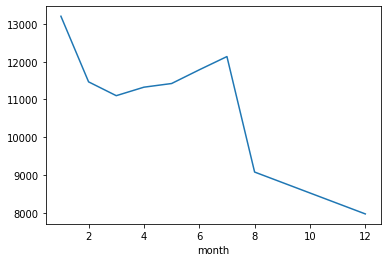

In [31]:
byMonth['lat'].plot()
'''Call frequency in January is the maximum and lowest in December
'''

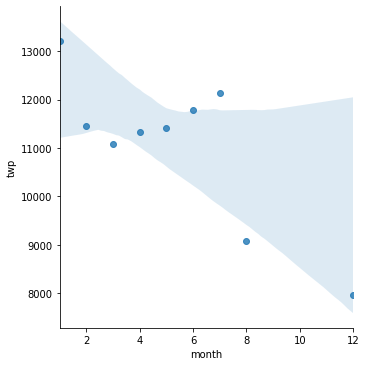

In [32]:
sns.lmplot(x='month',y='twp' ,data = byMonth.reset_index(), fit_reg=True)

In [33]:
df['date'] =  df['timeStamp'].apply(lambda x:x.date())
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,Thu,2015-12-10


In [34]:
dfDate = df.groupby('date').count()
dfDate


,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,hour,month,day of week
date,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389


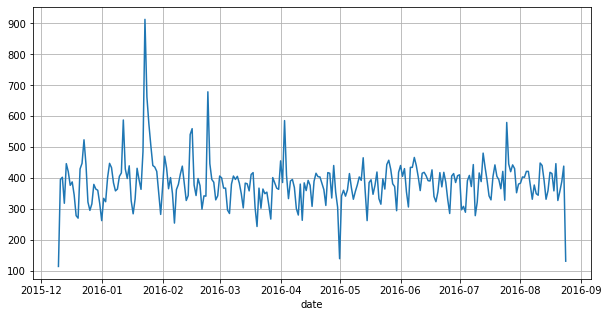

In [39]:
dfDate['lat'].plot(figsize=(10,5)).grid(True)

In [79]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,Traffic,11,8,Wed,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,Traffic,11,8,Wed,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,EMS,11,8,Wed,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,EMS,11,8,Wed,2016-08-24


In [84]:
df['reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [105]:
dfReason = df.groupby(['date','reason']).count()['lat'].unstack()

In [106]:
dfReason

reason,EMS,Fire,Traffic
date,,,
2015-12-10,57,15,43
2015-12-11,186,69,141
2015-12-12,189,68,146
2015-12-13,190,51,78
2015-12-14,222,39,186
...,...,...,...
2016-08-20,159,52,117
2016-08-21,165,54,138
2016-08-22,182,51,156


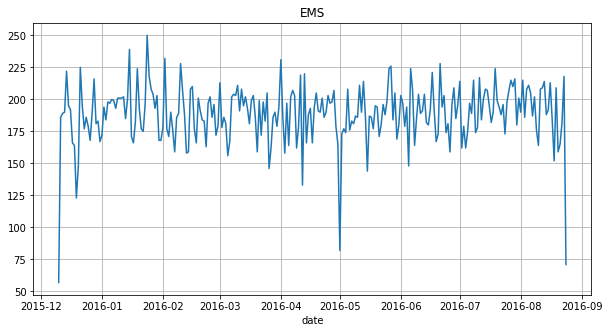

In [113]:
dfReason['EMS'].plot(figsize=(10,5),title = "EMS").grid(True)

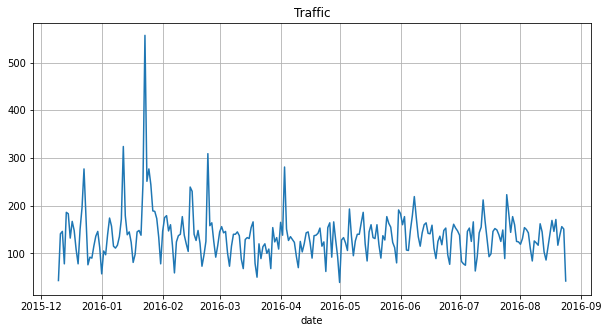

In [112]:
dfReason['Traffic'].plot(figsize=(10,5),title = "Traffic").grid(True)

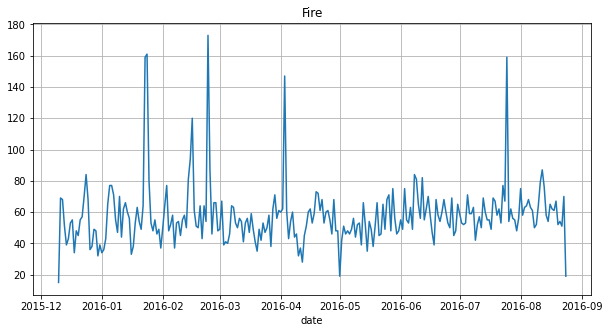

In [111]:
dfReason['Fire'].plot(figsize=(10,5),title = "Fire").grid(True)

In [116]:
dayHour = df.groupby(['day of week','hour']).count()['lat'].unstack()
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='hour', ylabel='day of week'>

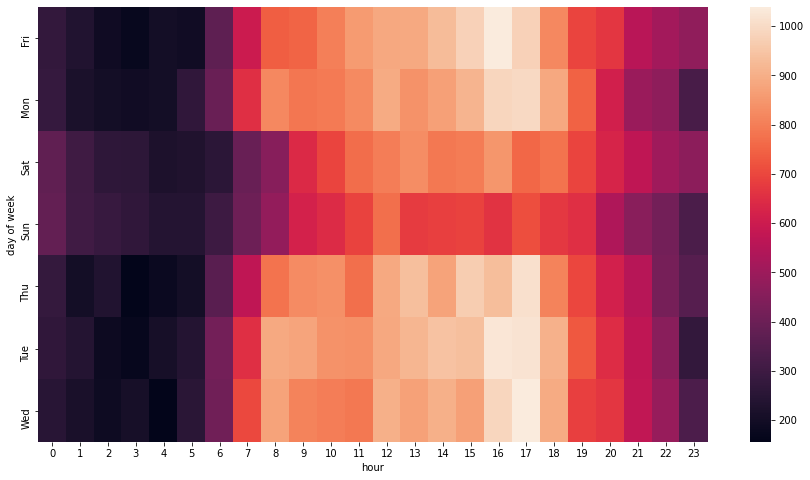

In [118]:
plt.figure(figsize = (15,8))
sns.heatmap(dayHour)

<Figure size 1080x576 with 0 Axes>

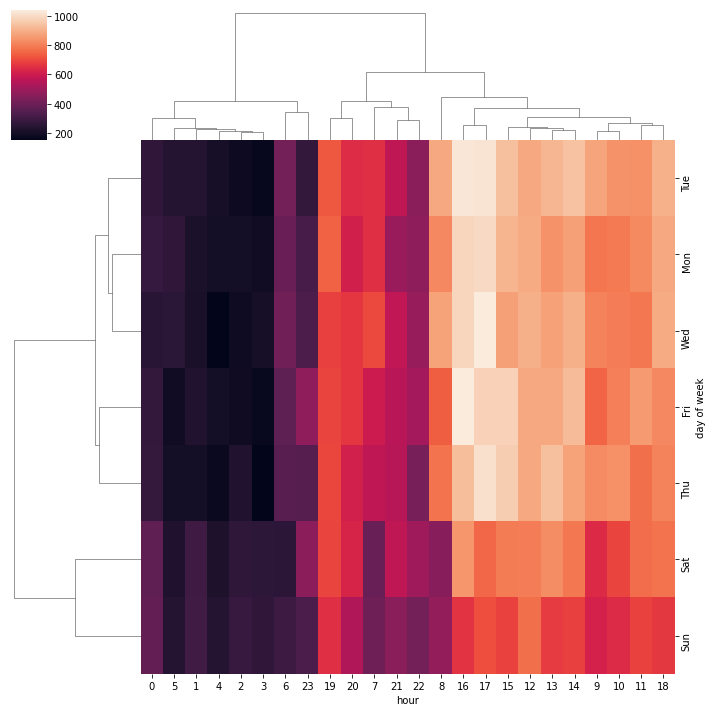

In [119]:
plt.figure(figsize = (15,8))
sns.clustermap(dayHour)

In [120]:
dayHour = df.groupby(['day of week','month']).count()['lat'].unstack()
dayHour

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='month', ylabel='day of week'>

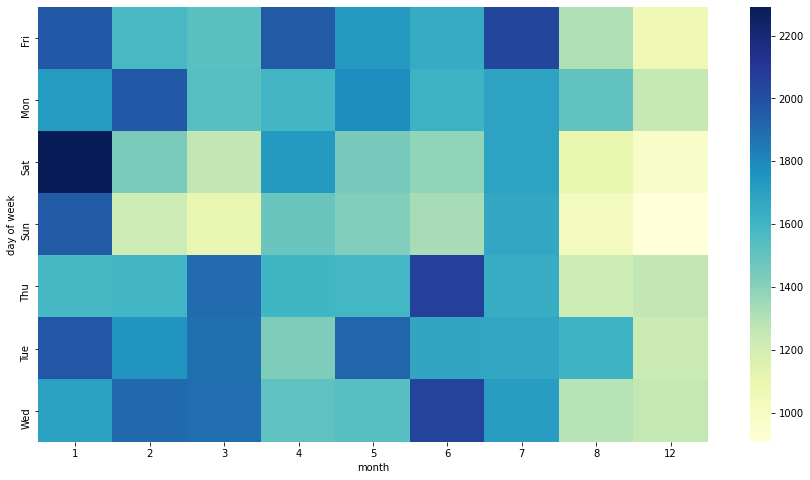

In [124]:
plt.figure(figsize = (15,8))
sns.heatmap(dayHour, cmap="YlGnBu")

<Figure size 1080x576 with 0 Axes>

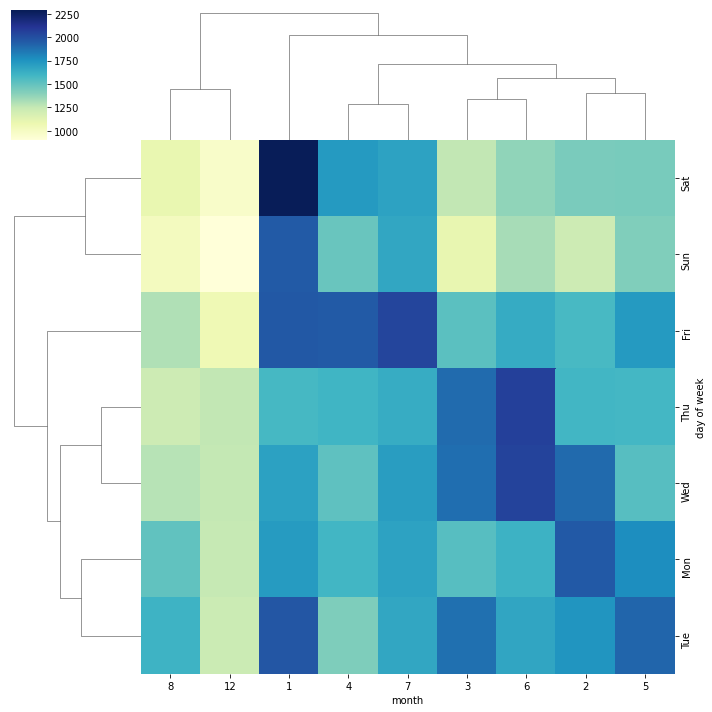

In [125]:
plt.figure(figsize = (15,8))
sns.clustermap(dayHour, cmap="YlGnBu")